In [1]:
#Sigmoid

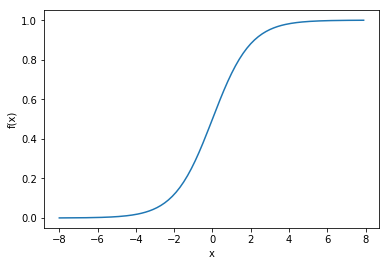

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [6]:
#bias and weights

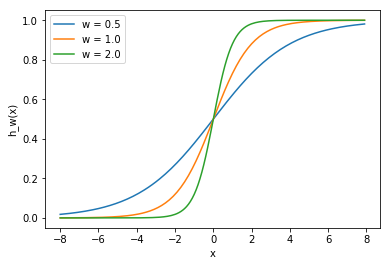

In [7]:
w1 = 0.5
w2 = 1.0
w3 = 2.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'
for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
    f = 1 / (1 + np.exp(-x*w))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc=2)
plt.show()

In [8]:
# when x>1

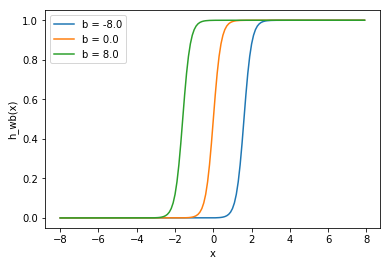

In [9]:
w = 5.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1 / (1 + np.exp(-(x*w+b)))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc=2)
plt.show()

In [10]:
#feed forward

In [12]:
import numpy as np
w1 = np.array([[0.2, 0.2, 0.2], [0.4, 0.4, 0.4], [0.6, 0.6, 0.6]])
w1

array([[0.2, 0.2, 0.2],
       [0.4, 0.4, 0.4],
       [0.6, 0.6, 0.6]])

In [13]:
w2 = np.zeros((1, 3))
w2[0,:] = np.array([0.5, 0.5, 0.5])
w2

array([[0.5, 0.5, 0.5]])

In [14]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])
print(b1)
print(b2)

[0.8 0.8 0.8]
[0.2]


In [15]:
def f(x):
    return 1 / (1 + np.exp(-x))

In [16]:
def simple_looped_nn_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        #Setup the input array which the weights will be multiplied by for each layer
        #If it's the first layer, the input array will be the x input vector
        #If it's not the first layer, the input to the next layer will be the 
        #output of the previous layer
        if l == 0:
            node_in = x
        else:
            node_in = h
        #Setup the output array for the nodes in layer l + 1
        h = np.zeros((w[l].shape[0],))
        #loop through the rows of the weight array
        for i in range(w[l].shape[0]):
            #setup the sum inside the activation function
            f_sum = 0
            #loop through the columns of the weight array
            for j in range(w[l].shape[1]):
                f_sum += w[l][i][j] * node_in[j]
            #add the bias
            f_sum += b[l][i]
            #finally use the activation function to calculate the
            #i-th output i.e. h1, h2, h3
            h[i] = f(f_sum)
    return h

In [17]:
w = [w1, w2]
b = [b1, b2]
#a dummy x input vector
x = [1.5, 2.0, 3.0]

In [18]:
w

[array([[0.2, 0.2, 0.2],
        [0.4, 0.4, 0.4],
        [0.6, 0.6, 0.6]]), array([[0.5, 0.5, 0.5]])]

In [19]:
b

[array([0.8, 0.8, 0.8]), array([0.2])]

In [20]:
x

[1.5, 2.0, 3.0]

In [21]:
simple_looped_nn_calc(3, x, w, b)

array([0.83545566])

In [22]:
%timeit simple_looped_nn_calc(3, x, w, b)

20 µs ± 907 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
def matrix_feed_forward_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        z = w[l].dot(node_in) + b[l]
        h = f(z)
    return h

In [24]:
#GD

In [26]:
x_old = 0 # The value does not matter as long as abs(x_new - x_old) > precision
x_new = 6 # The algorithm starts at x=6
gamma = 0.01 # step size
precision = 0.00001

def df(x):
    y = 4 * x**3 - 9 * x**2
    return y

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new += -gamma * df(x_old)

print("The local minimum occurs at %f" % x_new)
print(x_new - x_old)

The local minimum occurs at 2.249965
8.986384145703852e-06
